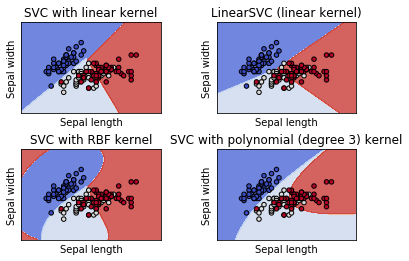

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [2]:
X.shape

(150L, 2L)

In [3]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

[1 5 2 2 0 0 1 0 0 0 0]


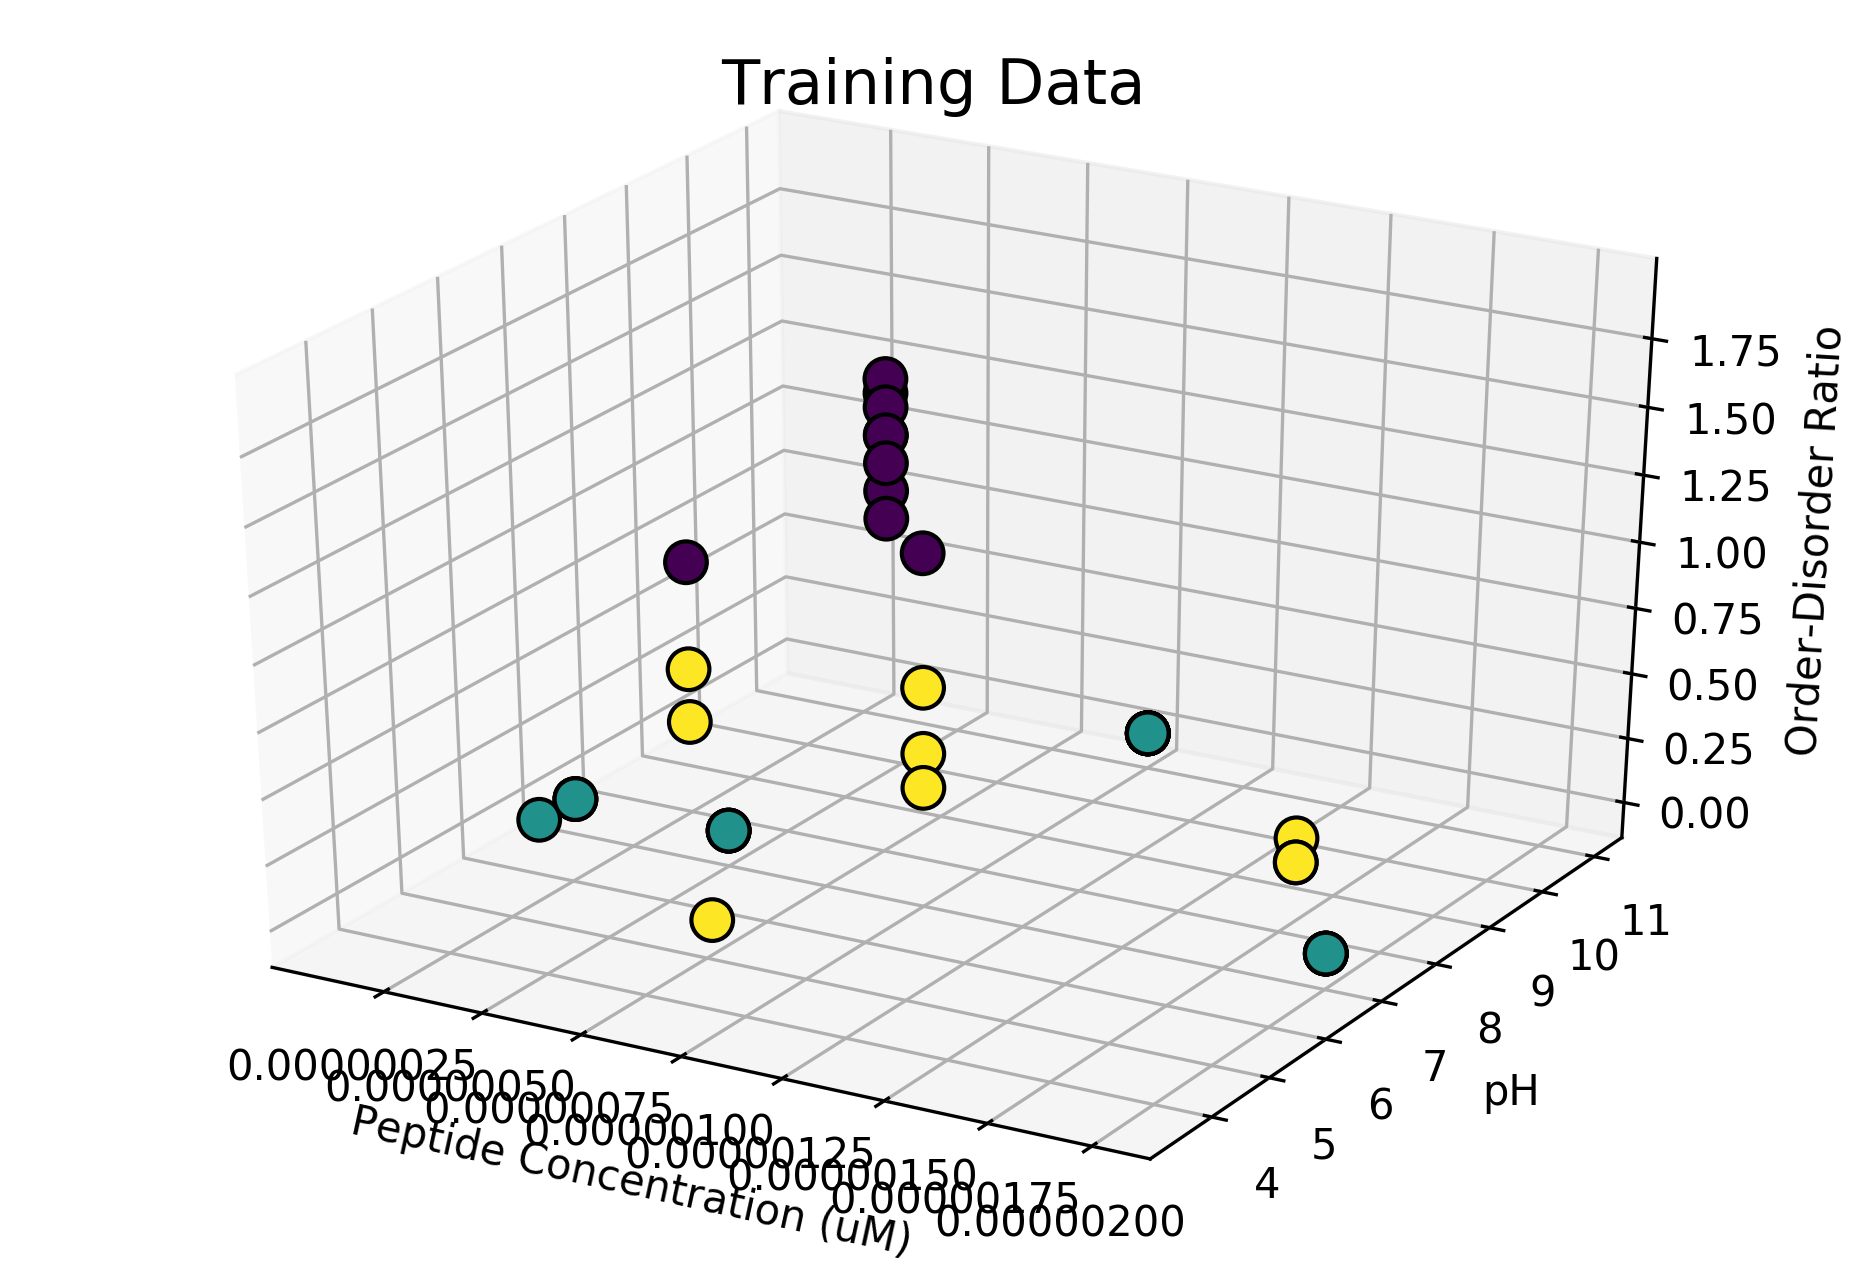

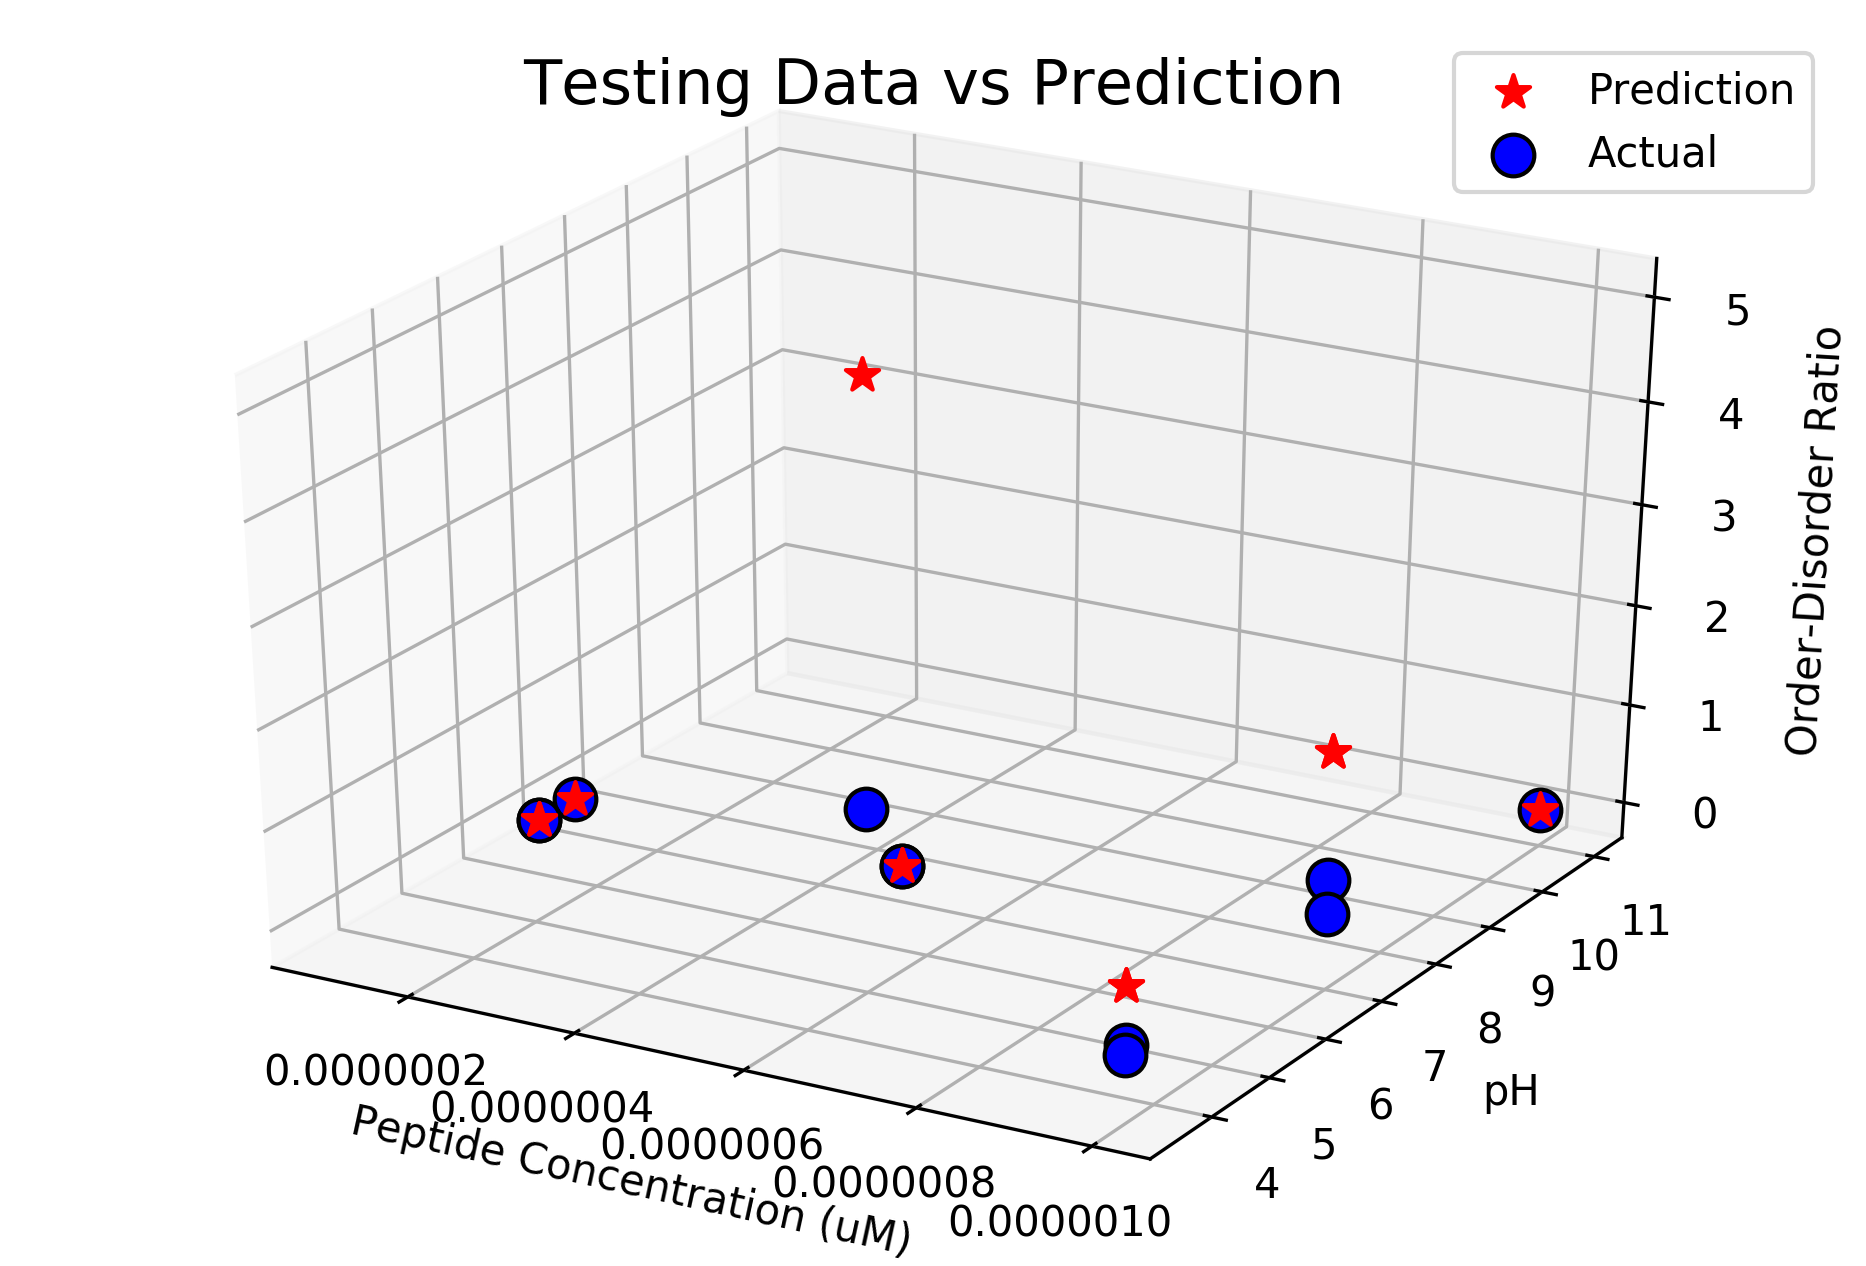

In [475]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading the DataFile
df = pd.read_csv('afm_datafile_v3.csv')

# Deciding parametes
test_size = 0.2 # Test size 
k = 5 # Number of nieghbors
weights = 'distance' # uniform or distance based weights for knn

# Concentration is in nM in Original dataset - converting to uM for making pretty plots
df['concentration'] = df['concentration']  


#------------------------------- NO USER INPUT BELOW THIS --------------------------

# Train-Test split
df_train, df_test = train_test_split(df, test_size = test_size, random_state = 15)

# Converting label type from continous to Multiclass for knn
lab_enc = preprocessing.LabelEncoder()
encoded_ROD = lab_enc.fit_transform(df_train['ROD'])
utils.multiclass.type_of_target(encoded_ROD)

# KNN fit here
knn = KNeighborsClassifier(n_neighbors = k, weights = weights)
knn.fit(df_train[['concentration', 'pH']], encoded_ROD)

# Predicting Ratio of order to disorder (ROD) for test data set
testing_pred = knn.predict(df_test[['concentration', 'pH']])

#Printing the predictions for Ratio of Order to Disorder for Test set 
print (testing_pred)

levels,labels = pd.factorize(df_train.Kind)
y = levels

# Plotting Training data set wrt to concentration, pH and ROD with 'Kind' as color levels
plt.figure(dpi = 300)
ax = Axes3D(plt.gcf())
ax.scatter(df_train.concentration, df_train.pH, df_train.ROD, zdir = 'z', c = y, s = 100, depthshade = False, edgecolor = 'k')
ax.set_xlabel('Peptide Concentration (uM)')
ax.set_ylabel('pH')
ax.set_zlabel('Order-Disorder Ratio')
ax.set_title('Training Data', fontsize = 15)

# Plotting Actual ROD vs Predicted values for specific concentration and pH from KNN for Test data set 
plt.figure(dpi = 300)
ax = Axes3D(plt.gcf())
ax.scatter(df_test.concentration, df_test.pH, testing_pred, zdir = 'z', c = 'r', marker = '*', s = 70, depthshade = False, label = 'Prediction')
ax.scatter(df_test.concentration, df_test.pH, df_test.ROD, zdir = 'z', c = 'b', marker = 'o', s = 100, depthshade = False, label = 'Actual', edgecolor = 'k')
ax.set_xlabel('Peptide Concentration (uM)')
ax.set_ylabel('pH')
ax.set_zlabel('Order-Disorder Ratio')
ax.set_title('Testing Data vs Prediction', fontsize = 15)
ax.legend(loc = 'best')


In [470]:
print(testing_pred == df_test['ROD'])
print(df_test['ROD'])
#print np.abs(testing_pred - df_test['ROD'])
print(testing_pred)
testing_pred/df_test['ROD']

26    False
12     True
44     True
30    False
33    False
37    False
45     True
31    False
16     True
38    False
52     True
Name: ROD, dtype: bool
26   1.850000
12   0.000000
44   0.000000
30   1.700000
33   1.900000
37   1.100000
45   0.000000
31   1.500000
16   0.000000
38   0.700000
52   0.000000
Name: ROD, dtype: float64
[13  0  0 13 13  7  0 13  0  7  0]


26    7.027027
12         nan
44         nan
30    7.647059
33    6.842105
37    6.363636
45         nan
31    8.666667
16         nan
38   10.000000
52         nan
Name: ROD, dtype: float64

(3.3999999999999999, 10.9)

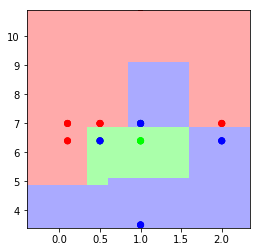

In [372]:
# additional library we will use 
from matplotlib.colors import ListedColormap

# just for convenience and similarity with sklearn tutorial
# I am going to assign our X and Y data to specific vectors
# this is not strictly needed and you could use elements df for the whole thing!

X=df_train[['concentration','pH']]

#this is a trick to turn our strings (type of element / class) into unique 
#numbers.  Play with this in a separate cell and make sure you know wth is 
#going on!
levels,labels=pd.factorize(df_train.Kind)
y=levels

#This determines levelspacing for our color map and the colors themselves
h=0.25
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# in the sklearn tutorial two different weights are compared
# the decision between "uniform" and "distance" determines the probability
# weight.  "uniform" is the version presented in class, you can change to 
# distance
weights='uniform'

# I am actually refitting the KNN here. If you had a big data set you would
# not do this, but I want you to have the convenience of changing K or 
# weights here in this cell. Large training sets with many features can take 
# awhile for KNN training! 

K=3
clf = KNeighborsClassifier(n_neighbors=2, weights=weights)
clf.fit(X,y)

# Straight from the tutorial - quickly read and see if you know what these 
# things are going - if you are < 5 min until end then you should skip this part 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = df_train.concentration.min() - 0.5  , df_train.concentration.max() + 0.5
y_min, y_max = df_train.pH.min() - 0.1  , df_train.pH.max() + 0.1  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h)) 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4,4));
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# This may be the 1st time you have seen how to color points by a 3rd vector
# In this case y ( see c=y in below statement ). This is very useful! 
plt.scatter(X.concentration, X.pH, c=y, cmap=cmap_bold)

# Set limits and lebels 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xlabel('Concentration of Peptide (uM)')
#plt.ylabel('Buffer pH')

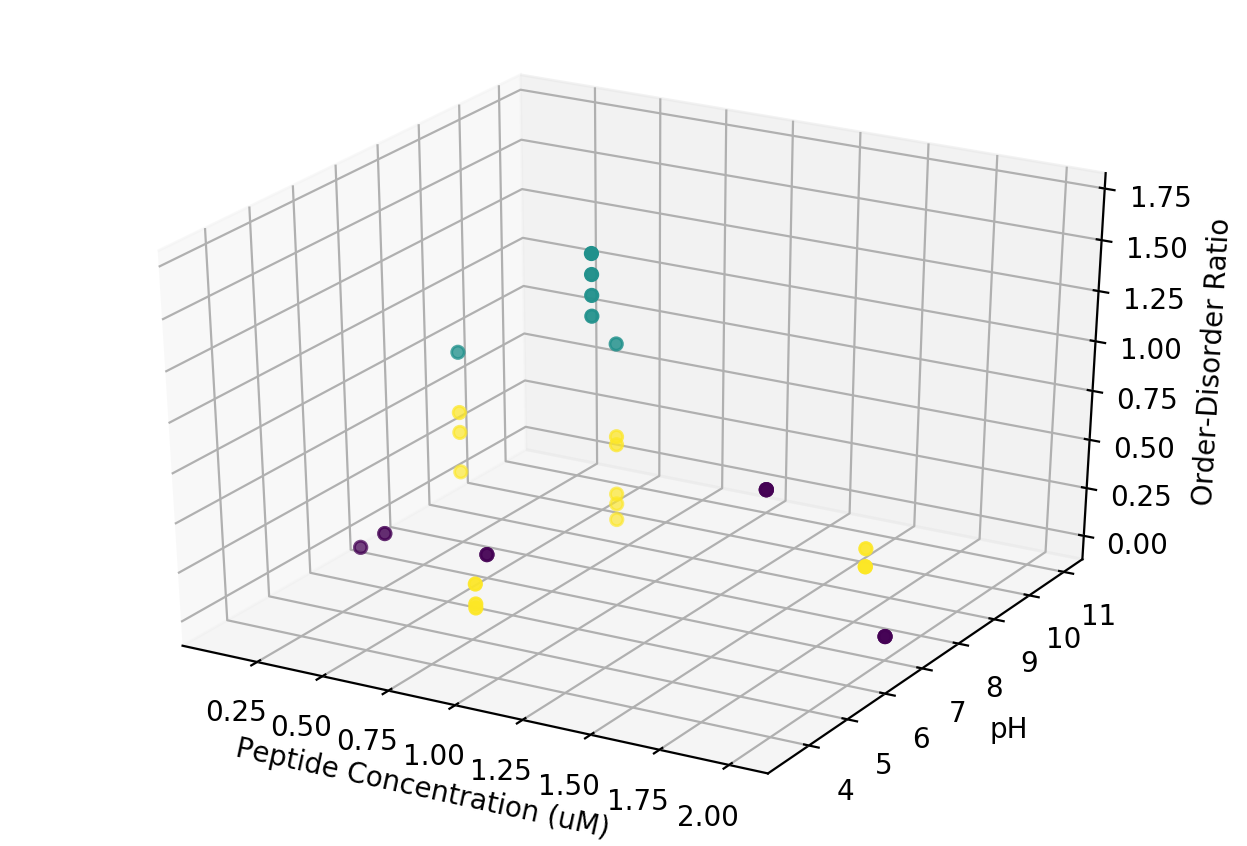

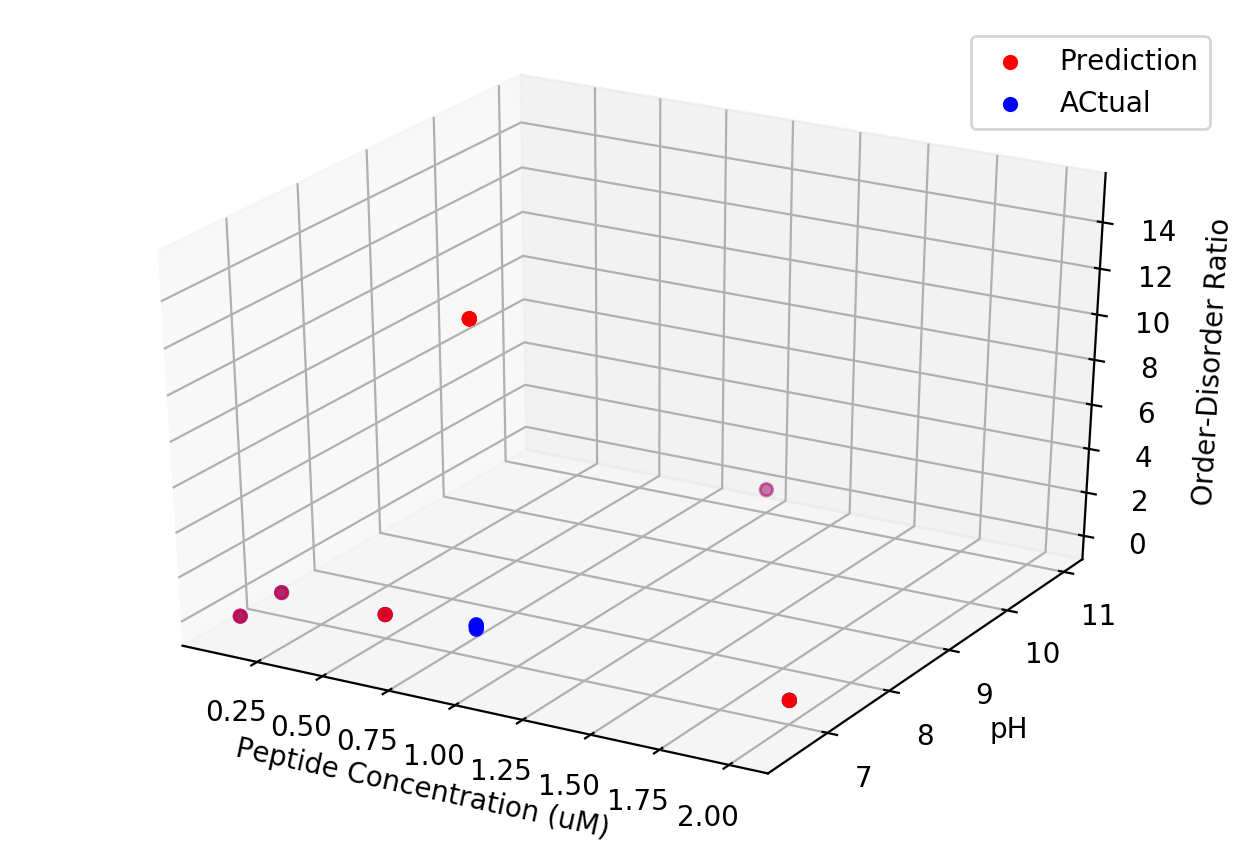

In [367]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(dpi = 200)
ax = Axes3D(plt.gcf())
ax.scatter(df_train.concentration, df_train.pH, df_train.ROD, zdir='z', c=y, depthshade=True)
ax.set_xlabel('Peptide Concentration (uM)')
ax.set_ylabel('pH')
ax.set_zlabel('Order-Disorder Ratio')

plt.figure(dpi = 200)
ax = Axes3D(plt.gcf())
ax.scatter(df_test.concentration, df_test.pH, testing_pred, zdir='z', c='r', depthshade=True, label = 'Prediction')
ax.scatter(df_test.concentration, df_test.pH, df_test.ROD, zdir='z', c='b', depthshade=True, label = 'Actual')
ax.set_xlabel('Peptide Concentration (uM)')
ax.set_ylabel('pH')
ax.set_zlabel('Order-Disorder Ratio')
ax.legend()


#plt.scatter(X.concentration, X.pH)


In [ ]:
sj_df = df_train

In [352]:
testing_pred

array([ 0, 11, 11, 11,  0,  1,  4], dtype=int64)

In [206]:
c=y
c

array([0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0])

In [42]:
np.arange(y_min, y_max, h)

array([ 6.3      ,  6.3000002,  6.3000004, ...,  7.0999994,  7.0999996,
        7.0999998])

In [44]:
np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h)) 

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [153]:
df_train['concentration'].max() - df_train['concentration'].min()

1.5e-06

In [155]:
x_min

3.9999999999999998e-07

In [156]:
x_max

2.0999999999999998e-06